In [1]:
# Practical 3: Bowling Performance Analysis in Cricket

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pretty plots
sns.set(style="whitegrid")

In [3]:
# ---------------------------------------------------------------
# Step 1: Create a synthetic bowling dataset
# ---------------------------------------------------------------

np.random.seed(42)

players = [f"Bowler_{i}" for i in range(1, 21)]
opponents = ["India", "Australia", "England", "Pakistan", "South Africa"]

data = {
    "Player": np.random.choice(players, 150),      # 150 match innings
    "Opponent": np.random.choice(opponents, 150),
    "Wickets": np.random.randint(0, 6, 150),       # wickets per innings (0–5)
    "Runs_Conceded": np.random.randint(10, 80, 150),
    "Balls_Bowled": np.random.randint(12, 60, 150) # overs 2 to 10 (T20/ODI style)
}

df = pd.DataFrame(data)

In [4]:
df.head()

,Player,Opponent,Wickets,Runs_Conceded,Balls_Bowled
0,Bowler_7,England,0,41,19
1,Bowler_20,India,2,33,39
2,Bowler_15,South Africa,1,21,47
3,Bowler_11,India,0,59,37
4,Bowler_8,England,1,44,19


In [5]:
df.shape

(150, 5)

In [6]:
# ---------------------------------------------------------------
# Step 2: Calculate key bowling metrics
# ---------------------------------------------------------------

bowler_stats = df.groupby("Player").agg({
    "Wickets": "sum",
    "Runs_Conceded": "sum",
    "Balls_Bowled": "sum"
}).reset_index()

# Avoid division issues
bowler_stats["Wickets"] = bowler_stats["Wickets"].replace(0, np.nan)

# Bowling Average = Runs / Wickets
bowler_stats["Bowling_Average"] = bowler_stats["Runs_Conceded"] / bowler_stats["Wickets"]

# Economy Rate = Runs / Overs
bowler_stats["Overs"] = bowler_stats["Balls_Bowled"] / 6
bowler_stats["Economy_Rate"] = bowler_stats["Runs_Conceded"] / bowler_stats["Overs"]

# Strike Rate = Balls bowled / wickets
bowler_stats["Strike_Rate"] = bowler_stats["Balls_Bowled"] / bowler_stats["Wickets"]

print("\n🏏 Bowling Performance Summary:")
print(bowler_stats.head())


🏏 Bowling Performance Summary:
      Player  Wickets  Runs_Conceded  Balls_Bowled  Bowling_Average  \
0   Bowler_1       25            403           344        16.120000   
1  Bowler_10       18            302           235        16.777778   
2  Bowler_11       11            354           254        32.181818   
3  Bowler_12       14            364           467        26.000000   
4  Bowler_13       29            327           189        11.275862   

       Overs  Economy_Rate  Strike_Rate  
0  57.333333      7.029070    13.760000  
1  39.166667      7.710638    13.055556  
2  42.333333      8.362205    23.090909  
3  77.833333      4.676660    33.357143  
4  31.500000     10.380952     6.517241  


In [7]:
# ---------------------------------------------------------------
# Step 3: Identify Top Bowlers
# ---------------------------------------------------------------

# Top bowlers sorted by Wickets, Economy, Avg
top_bowlers = bowler_stats.sort_values(
    by=["Wickets", "Economy_Rate", "Bowling_Average"],
    ascending=[False, True, True]
).head(5)

print("\n⭐ Top 5 Bowlers:")
print(top_bowlers)



⭐ Top 5 Bowlers:
       Player  Wickets  Runs_Conceded  Balls_Bowled  Bowling_Average  \
17   Bowler_7       32            563           509        17.593750   
6   Bowler_15       29            523           372        18.034483   
4   Bowler_13       29            327           189        11.275862   
13   Bowler_3       26            440           285        16.923077   
0    Bowler_1       25            403           344        16.120000   

        Overs  Economy_Rate  Strike_Rate  
17  84.833333      6.636542    15.906250  
6   62.000000      8.435484    12.827586  
4   31.500000     10.380952     6.517241  
13  47.500000      9.263158    10.961538  
0   57.333333      7.029070    13.760000  


In [8]:
# ---------------------------------------------------------------
# Step 4: Analyze performance vs different teams
# ---------------------------------------------------------------

team_stats = df.groupby(["Player", "Opponent"])["Wickets"].sum().reset_index()

print("\n📊 Sample Performance vs Teams:")
print(team_stats.head())


📊 Sample Performance vs Teams:
     Player      Opponent  Wickets
0  Bowler_1     Australia        3
1  Bowler_1       England        4
2  Bowler_1         India        6
3  Bowler_1      Pakistan        5
4  Bowler_1  South Africa        7


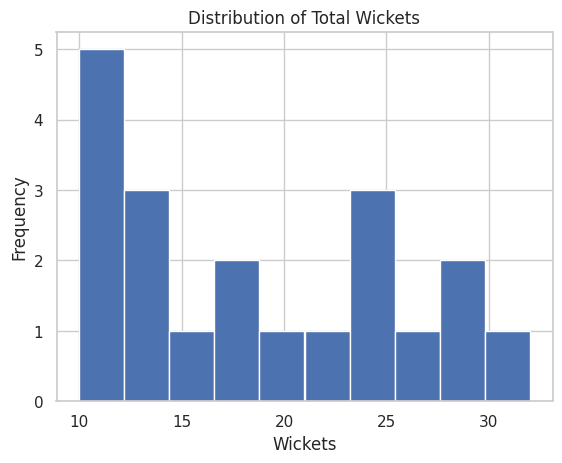

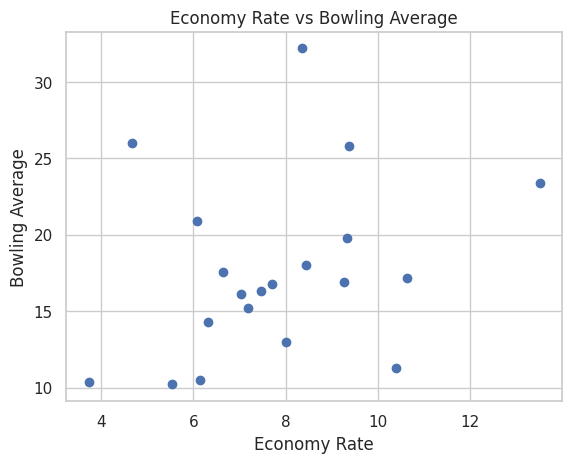

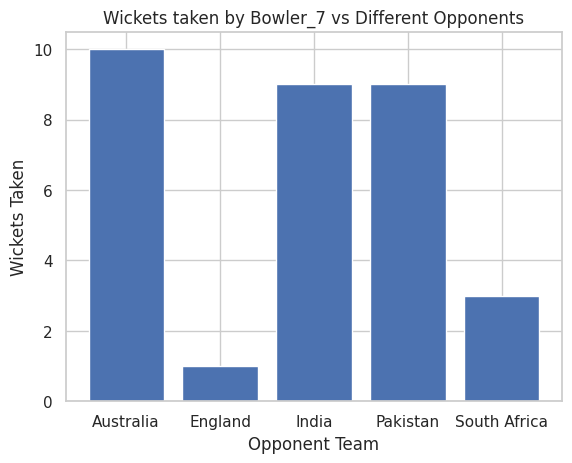

In [9]:
# ---------------------------------------------------------------
# Step 5: Visualizations
# ---------------------------------------------------------------

# Distribution of wickets
plt.figure()
plt.hist(bowler_stats["Wickets"])
plt.title("Distribution of Total Wickets")
plt.xlabel("Wickets")
plt.ylabel("Frequency")
plt.show()

# Economy vs Bowling Average
plt.figure()
plt.scatter(bowler_stats["Economy_Rate"], bowler_stats["Bowling_Average"])
plt.title("Economy Rate vs Bowling Average")
plt.xlabel("Economy Rate")
plt.ylabel("Bowling Average")
plt.show()

# Best bowler performance vs teams
best_bowler = top_bowlers["Player"].iloc[0]
bowler_vs_team = team_stats[team_stats["Player"] == best_bowler]

plt.figure()
plt.bar(bowler_vs_team["Opponent"], bowler_vs_team["Wickets"])
plt.title(f"Wickets taken by {best_bowler} vs Different Opponents")
plt.xlabel("Opponent Team")
plt.ylabel("Wickets Taken")
plt.show()